In [120]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import collections

In [ ]:
data = pd.read_csv('C:/Users/Ceiec04/Desktop/Prediccion_Alertas_Alimentarias/Datasets/full_RASFF_DATA_20072020.csv', sep=';', 
                   header=0, index_col = 0)

In [ ]:
mask = (data['DATE_CASE'] >= '2020-01-01') & (data['DATE_CASE'] <= '2020-12-31')
data2020 = data.loc[mask]

In [ ]:
mask = (data['DATE_CASE'] >= '2019-01-01') & (data['DATE_CASE'] <= '2019-12-31')
data2019 = data.loc[mask]

In [ ]:
mask = (data['DATE_CASE'] >= '2018-01-01') & (data['DATE_CASE'] <= '2018-12-31')
data2018 = data.loc[mask]

# Diagramas de barras

DATE_CASE
1    256
2    267
3    331
4    307
5    313
6    319
7    339
dtype: int64


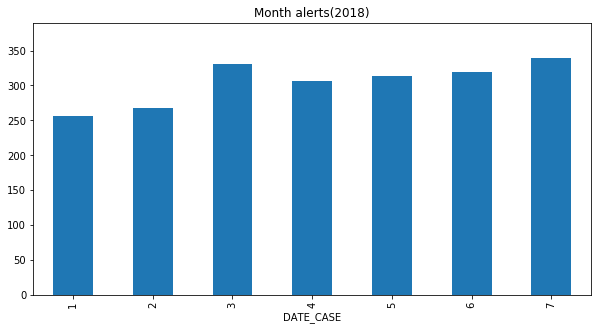

In [126]:
axes = plt.gca()
axes.set_ylim([0,390])
chart = data2018.groupby(data2018.DATE_CASE.dt.month).size().drop(labels=[8,9,10,11,12])
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts(2018)')

DATE_CASE
1    301
2    361
3    363
4    351
5    282
6    312
7    383
dtype: int64


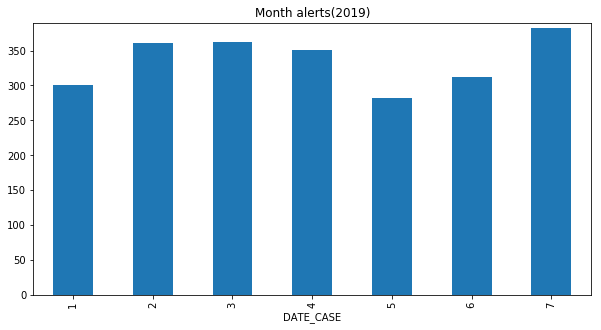

In [127]:
axes = plt.gca()
axes.set_ylim([0,390])
chart = data2019.groupby(data2019.DATE_CASE.dt.month).size().drop(labels=[8,9,10,11,12])
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts(2019)')

DATE_CASE
1    269
2    269
3    283
4    184
5    229
6    233
7    183
dtype: int64


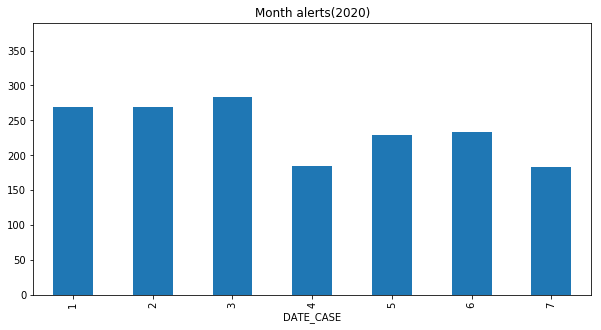

In [128]:
axes = plt.gca()
axes.set_ylim([0,390])
chart = data2020.groupby(data2020.DATE_CASE.dt.month).size()
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts(2020)')

# Diagrama de lineas

In [131]:
time_alerts = data.groupby('DATE_CASE').size()
idx = pd.date_range('01-01-2018', '31-07-2020')
time_alerts = time_alerts.reindex(idx, fill_value=0)
time_alerts = time_alerts.to_frame()
time_alerts.columns = ['day_alerts']
time_alerts.index.name = 'date'
time_alerts['month_alerts'] = time_alerts['day_alerts'].resample('M').sum()
month_serie = time_alerts[time_alerts.month_alerts.notnull()]
month_serie = month_serie.drop(['day_alerts'], axis=1)
month_serie = month_serie.values.flatten()
month_serie

array([256., 267., 331., 307., 313., 319., 339., 270., 247., 334., 354.,
       279., 301., 361., 363., 351., 282., 312., 383., 282., 400., 365.,
       342., 324., 269., 269., 283., 184., 229., 233., 183.])

Text(0,0.5,'Number of alerts')

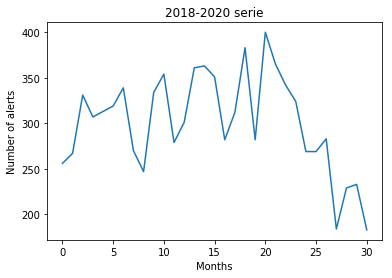

In [132]:
plt.plot(month_serie) 
plt.title('2018-2020 serie')
plt.xlabel('Months')
plt.ylabel('Number of alerts')

# Grafo

In [244]:
mask = (data['DATE_CASE'] >= '2016-01-01') & (data['DATE_CASE'] <= '2016-06-31')
data2019 = data.loc[mask]
new_data = data2019

In [246]:
all_routes = []

for index, row in new_data.iterrows():
    origin=row['ORIG_COUNTRY'].split(",")   
    destiny=row['DESTIN_COUNTRY'].split(",") 
    concern=row['CONCERN_COUNTRY'].split(",")
    

    for i in origin:
        
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route) 

In [248]:
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())
g_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, g_distance_dict, 'distance')

In [250]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('United States', 522),
 ('China', 398),
 ('Spain', 252),
 ('France', 247),
 ('Netherlands', 217),
 ('Turkey', 193),
 ('India', 166),
 ('Italy', 147),
 ('Poland', 142),
 ('Germany', 119),
 ('Hong Kong', 114),
 ('Denmark', 109),
 ('United Kingdom', 83),
 ('Thailand', 80),
 ('Czech Republic', 77),
 ('Belgium', 70),
 ('Uruguay', 68),
 ('Iran', 67),
 ('Egypt', 65),
 ('Vietnam', 60),
 ('Brazil', 52),
 ('Indonesia', 49),
 ('Laos', 42),
 ('Japan', 38),
 ('Philippines', 36),
 ('Pakistan', 34),
 ('Romania', 28),
 ('Colombia', 28),
 ('Argentina', 27),
 ('Bulgaria', 26),
 ('Morocco', 26),
 ('Lithuania', 23),
 ('Peru', 22),
 ('Austria', 22),
 ('Tanzania', 20),
 ('South Korea', 18),
 ('South Africa', 18),
 ('Georgia', 18),
 ('Hungary', 17),
 ('Sweden', 16),
 ('Ireland', 16),
 ('Tunisia', 14),
 ('Uzbekistan', 13),
 ('Serbia', 13),
 ('Greece', 12),
 ('Iceland', 11),
 ('Sri Lanka', 11),
 ('Madagascar', 10),
 ('Ukraine', 10),
 ('Russia', 10),
 ('Portugal', 10),
 ('Mozambique', 10),
 ('Cambodia', 9),
 